In [1]:
#importing our lib
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)

#remove unecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in our dataset
df1 = pd.read_csv('imdb.csv')

In [3]:
df1.head()

,Title,year,Rating,Run Time,imdb_rating,Budget,Gross_worldwide,Director,Metascore,Hour,hr_min,Min,RunTime_min
0,Avengers: Endgame,2019,PG-13,3h 1m,8,356000000,2797501328,Anthony Russo,78,3,180,1.0,181
1,1917,2019,R,1h 59m,8,95000000,384919389,Sam Mendes,78,1,60,59.0,119
2,Snatch,2000,R,1h 42m,8,6000000,83557872,Guy Ritchie,55,1,60,42.0,102
3,Star Wars: Episode V - The Empire Strikes Back,1980,PG,2h 4m,8,18000000,538375067,Irvin Kershner,82,2,120,4.0,124
4,Life Is Beautiful,1997,PG-13,1h 56m,8,20000000,230098753,Roberto Benigni,59,1,60,56.0,116


In [49]:
#drop columns i dont need
df_new =df1.drop(['Hour', 'hr_min','Min'], axis = 1)


In [50]:
df_new.head()

,Title,year,Rating,Run Time,imdb_rating,Budget,Gross_worldwide,Director,Metascore,RunTime_min
0,Avengers: Endgame,2019,PG-13,3h 1m,8,356000000,2797501328,Anthony Russo,78,181
1,1917,2019,R,1h 59m,8,95000000,384919389,Sam Mendes,78,119
2,Snatch,2000,R,1h 42m,8,6000000,83557872,Guy Ritchie,55,102
3,Star Wars: Episode V - The Empire Strikes Back,1980,PG,2h 4m,8,18000000,538375067,Irvin Kershner,82,124
4,Life Is Beautiful,1997,PG-13,1h 56m,8,20000000,230098753,Roberto Benigni,59,116


In [6]:
#check data types
df_new.dtypes

Title              object
year                int64
Rating             object
Run Time           object
imdb_rating         int64
Budget              int64
Gross_worldwide     int64
Director           object
Metascore           int64
RunTime_min         int64
dtype: object

In [7]:
#This helps you view your whole dataframe 
pd.set_option('display.max_rows', None)

In [68]:
#check the highest grossing movie  and the movie with the least budget
highest_gross =df_new.sort_values(by=['Gross_worldwide'], inplace =False, ascending = False)
highest_gross.head()

,Title,year,Rating,Run Time,imdb_rating,Budget,Gross_worldwide,Director,Metascore,RunTime_min
0,18,2019,5,87,8,356000000,2797501328,4,78,181
102,19,2018,5,56,8,321000000,2048359754,4,68,149
17,142,2021,5,55,8,200000000,1892667830,61,71,148
99,68,2011,5,37,8,125000000,1342359942,23,85,130
88,176,2003,5,88,9,94000000,1146436214,90,94,201


###### Avengers: End Game is the highest Grossing movie $279,7501,328

In [67]:
least_Budget =df_new.sort_values(by=['Budget'], inplace =False, ascending = True)
least_Budget.head()

,Title,year,Rating,Run Time,imdb_rating,Budget,Gross_worldwide,Director,Metascore,RunTime_min
83,182,1957,3,13,8,150000,288931,46,88,96
182,33,1997,4,6,8,180000,933933,71,77,89
62,102,1975,4,8,8,229575,1940906,120,91,91
104,123,1950,3,5,8,250000,46808,0,98,88
124,0,1957,0,13,9,350000,955,111,96,96


##### The Seventh Seal has the least Budget $150,000 according to Imdb 

In [10]:
#compare correlation of Numeric features:


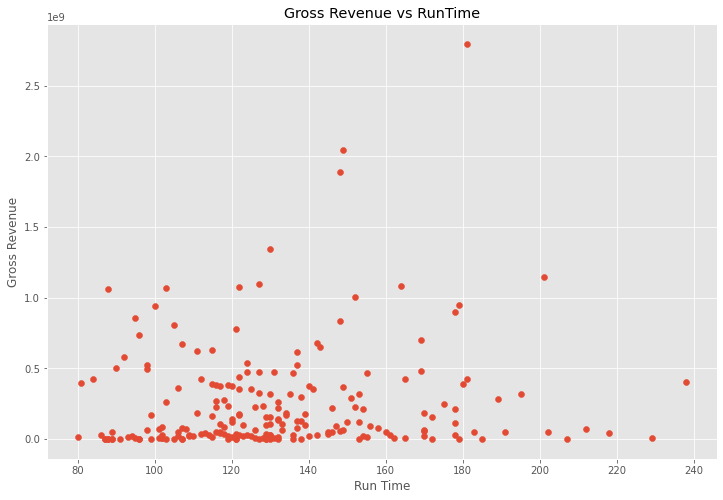

In [24]:
plt.scatter(x=df_new['RunTime_min'], y=df_new['Gross_worldwide'])
plt.title ('Gross Revenue vs RunTime')

plt.xlabel('Run Time')

plt.ylabel ('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='RunTime_min', ylabel='Gross_worldwide'>

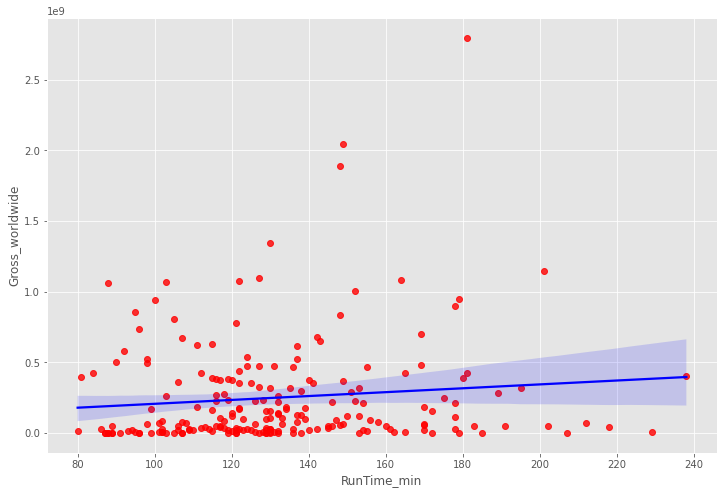

In [36]:
#Use regplot to get better understanding of the viz
sns.regplot(x='RunTime_min', y='Gross_worldwide', data = df_new, scatter_kws={"color":"red"},line_kws={"color" :"blue"})


In [37]:
#get my correletaion table
df_new.corr(method = "pearson")

,year,imdb_rating,Budget,Gross_worldwide,Metascore,RunTime_min
year,1.000000,-0.033474,0.128611,0.409157,-0.403276,-0.034060
imdb_rating,-0.033474,1.000000,-0.013606,0.074401,0.154170,0.213534
Budget,0.128611,-0.013606,1.000000,0.022989,-0.013693,0.045834
Gross_worldwide,0.409157,0.074401,0.022989,1.000000,-0.134532,0.109624
Metascore,-0.403276,0.154170,-0.013693,-0.134532,1.000000,-0.067983
RunTime_min,-0.034060,0.213534,0.045834,0.109624,-0.067983,1.000000


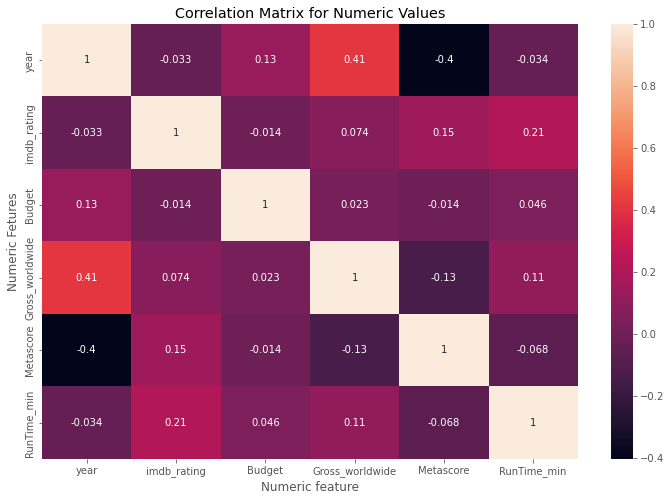

In [42]:
#viz the correlation table for numeric features only
corr_matrix = df_new.corr(method="pearson") 
sns.heatmap(corr_matrix, annot=True)
plt.title ('Correlation Matrix for Numeric Values')

plt.xlabel('Numeric feature')

plt.ylabel ('Numeric Fetures')
plt.show()

Gross_world wide has a strong postive correlation with year

In [66]:
#Correlation between Categorical features:

df_strings = df_new
for col in df_strings.columns:
        if (df_strings[col].dtype =='object'):
            df_strings[col] = df_strings[col].astype('category')
            df_strings[col] =df_strings[col].cat.codes
            
df_strings.head()

,Title,year,Rating,Run Time,imdb_rating,Budget,Gross_worldwide,Director,Metascore,RunTime_min
0,18,2019,5,87,8,356000000,2797501328,4,78,181
1,2,2019,7,34,8,95000000,384919389,108,78,119
2,139,2000,7,18,8,6000000,83557872,43,55,102
3,147,1980,4,73,8,18000000,538375067,47,82,124
4,90,1997,5,31,8,20000000,230098753,103,59,116


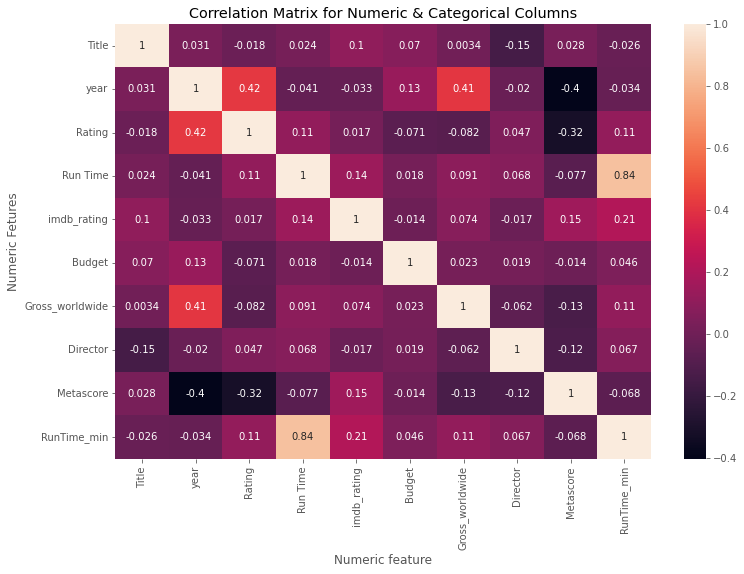

In [56]:
corr_matrix = df_strings.corr(method="pearson") 
sns.heatmap(corr_matrix, annot=True)
plt.title ('Correlation Matrix for Numeric & Categorical Columns')

plt.xlabel('Numeric feature')

plt.ylabel ('Numeric Fetures')
plt.show()

In [63]:
#get the pairs of each correlation matrix
corr_mat = df_strings.corr()
corr_pairs = corr_mat.unstack()

#sort them in correlated pairs
sort_pairs = corr_pairs.sort_values()
sort_pairs

Metascore        year              -0.403276
year             Metascore         -0.403276
Rating           Metascore         -0.320997
Metascore        Rating            -0.320997
Director         Title             -0.147516
Title            Director          -0.147516
Metascore        Gross_worldwide   -0.134532
Gross_worldwide  Metascore         -0.134532
Director         Metascore         -0.121878
Metascore        Director          -0.121878
Gross_worldwide  Rating            -0.081524
Rating           Gross_worldwide   -0.081524
Run Time         Metascore         -0.076659
Metascore        Run Time          -0.076659
Rating           Budget            -0.070779
Budget           Rating            -0.070779
RunTime_min      Metascore         -0.067983
Metascore        RunTime_min       -0.067983
Gross_worldwide  Director          -0.061683
Director         Gross_worldwide   -0.061683
Run Time         year              -0.041220
year             Run Time          -0.041220
          

In [65]:
#To get the highest postive correlated pairs in aquick glance
high_corr = sort_pairs[(sort_pairs)> 0.40]
high_corr

year             Gross_worldwide    0.409157
Gross_worldwide  year               0.409157
Rating           year               0.418952
year             Rating             0.418952
RunTime_min      Run Time           0.843357
Run Time         RunTime_min        0.843357
Title            Title              1.000000
Director         Director           1.000000
Gross_worldwide  Gross_worldwide    1.000000
Budget           Budget             1.000000
imdb_rating      imdb_rating        1.000000
Run Time         Run Time           1.000000
Rating           Rating             1.000000
year             year               1.000000
Metascore        Metascore          1.000000
RunTime_min      RunTime_min        1.000000
dtype: float64

## Gross earnings and Rating have a postive correlation with year